# test sound augmentation functions

In [1]:
%load_ext autoreload
%autoreload 2

import os
import librosa
import matplotlib.pyplot as plt
# from birdsong.audiotransform.sound_augmenter import *
from birdsong.config import config


/var/folders/59/__mg86nn4hx9y9ck3zxxr7680000gn/T/ipykernel_66926/1282545503.py:20: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  signal_db = librosa.amplitude_to_db(signal_stft)


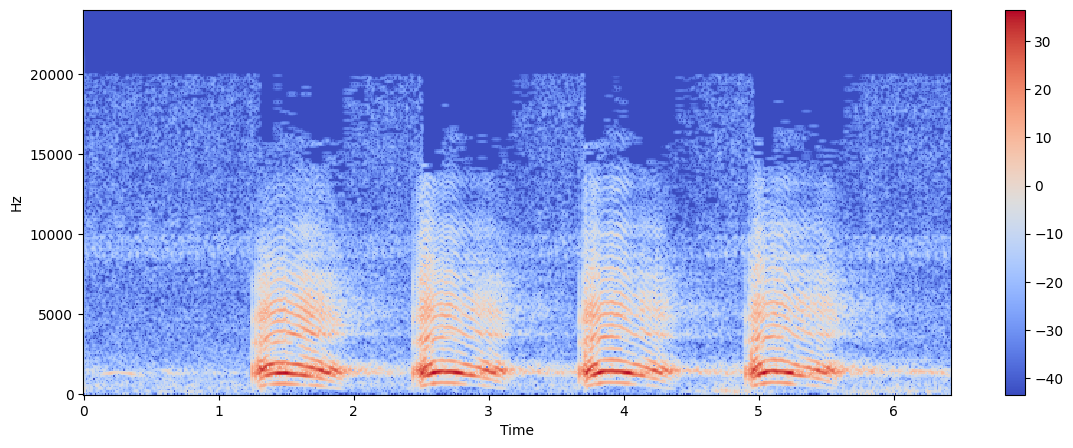

In [2]:


SOUND_DIR = '../raw_data/train_audio/'
SOUND_DIR_FILE= os.path.join(SOUND_DIR,'amecro/XC126022.mp3')


# Load the mp3 file
#def load_sound_file():

signal,simpling_rate = librosa.load(SOUND_DIR_FILE,
                                     offset=config.READING_OFFSET,
                                     duration=config.DURATION_IN_SECONDS,
                                     sr=config.SAMPLING_RATE,
                                     mono=True) # sr = sampling rate


signal_stft = librosa.stft(signal,
                           n_fft=config.STFT_NUMBER_SAMPLES)



signal_db = librosa.amplitude_to_db(signal_stft)

plt.figure(figsize=(14, 5))
librosa.display.specshow(signal_db,
                         sr=config.SAMPLING_RATE,
                         x_axis='time',
                         y_axis='hz')
plt.colorbar()


/var/folders/59/__mg86nn4hx9y9ck3zxxr7680000gn/T/ipykernel_66926/2699224036.py:8: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  augmented_sound_db = librosa.amplitude_to_db(augmented_sound_stft)


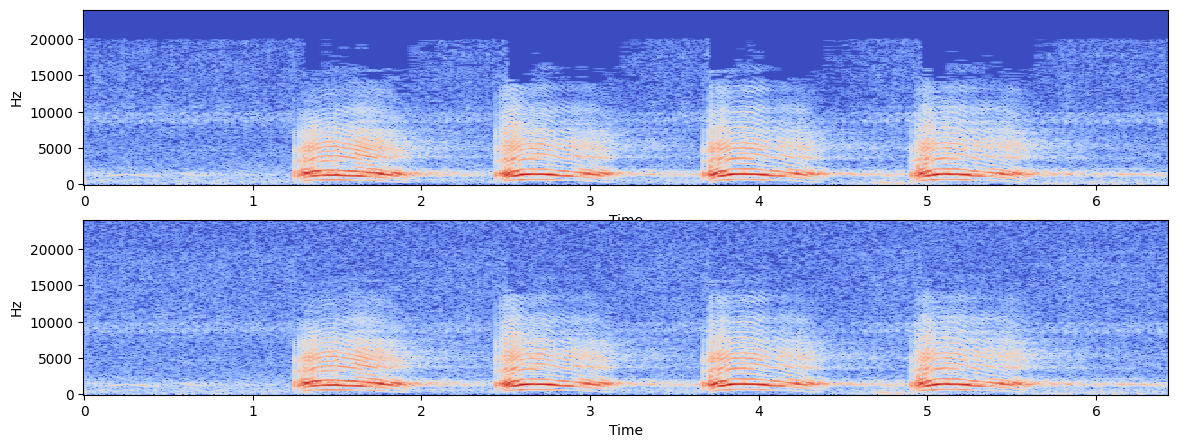

In [3]:
augmented_sound = transform_signal_add_SNR_noise(signal,
                                                 sample_rate=config.SAMPLING_RATE)

fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(14, 5))
augmented_sound_stft = librosa.stft(augmented_sound,
                                    n_fft=config.STFT_NUMBER_SAMPLES)

augmented_sound_db = librosa.amplitude_to_db(augmented_sound_stft)
librosa.display.specshow(signal_db,
                         sr=config.SAMPLING_RATE,
                         x_axis='time',
                         y_axis='hz', ax=ax[0])
librosa.display.specshow(augmented_sound_db,
                         sr=config.SAMPLING_RATE,
                         x_axis='time', y_axis='hz', ax=ax[1])


In [3]:
from birdsong import DATA_TRAIN_AUDIO_PATH, DATA_SPLIT_PATH, DATA_RAW_PATH

In [4]:
print(DATA_TRAIN_AUDIO_PATH)

/home/sheshka/code/Raman-Sheshka/birdsong_classifier/raw_data/train_audio


In [75]:
import pandas as pd
rating_threshold = 2.5
country = "France"

ref_csv_file_path = os.path.join(DATA_RAW_PATH,"train.csv")
df = pd.read_csv(ref_csv_file_path)
# create_folder_if_not_exists(self.silence_path)
_species = list(df.species[df['country'] == country].unique())
df_country_species = df[df['species'].isin(_species)]
df_country_selection = df_country_species[df_country_species['rating'] > rating_threshold]
bird_code_list = df_country_selection.loc[:,'ebird_code'].unique().tolist()

In [76]:
bird_code_list

import random

random.seed(42)
random.sample(bird_code_list, 3)

['comred', 'barswa', 'horlar']

In [73]:
raw_label_test

['norsho']

In [50]:
import shutil

def copy_dir_content(parent_src, parent_dst, directory_to_copy):
    def ignored_files(adir,filenames):
        return [filename for filename in filenames if filename.startswith(".")]

    src = os.path.join(parent_src,directory_to_copy)
    dst = os.path.join(parent_dst,directory_to_copy)
    shutil.copytree(src, dst, ignore=ignored_files)

parent_src = DATA_TRAIN_AUDIO_PATH
dst_src = os.path.join(DATA_RAW_PATH,"test_train_data")

for bird_code in raw_label_test:
    copy_dir_content(parent_src, dst_src, bird_code)

In [68]:
shutil.rmtree(os.path.join(DATA_RAW_PATH,"test_train_data"))

In [65]:
from birdsong.audiotransform.slicer import AudioSlicer
test_audio_slicer = AudioSlicer()
df, list_test = test_audio_slicer.get_bird_code_list()
import random
raw_label_test = random.sample(list_test,nb_sample)
print(raw_label_test)

['norsho']


In [62]:
test_audio_slicer.input_directory = dst_src
test_audio_slicer.target_directory = os.path.join(DATA_RAW_PATH,"test_split_data")

In [63]:
test_audio_slicer.__dict__

{'rating_threshold': 2.5,
 'country': 'France',
 'input_directory': '/home/sheshka/code/Raman-Sheshka/birdsong_classifier/raw_data/test_train_data',
 'target_directory': '/home/sheshka/code/Raman-Sheshka/birdsong_classifier/raw_data/test_split_data',
 'silence_intolerance': 6,
 'frame_length': 2048,
 'duration': 3000,
 'silence_path': None}

In [64]:
test_audio_slicer.slice_audio()

✅ Folder /home/sheshka/code/Raman-Sheshka/birdsong_classifier/raw_data/test_split_data/silence created
✅ Folder /home/sheshka/code/Raman-Sheshka/birdsong_classifier/raw_data/test_split_data/calqua created


In [69]:
shutil.rmtree(os.path.join(DATA_RAW_PATH,"test_split_data"))

In [28]:
def my_function(input_string: str) -> str:
    """a function that takes in a string of one or more words,
    and returns the same string, but with all five or more letter words reversed
    """
    def modify_string(word):
        return word[::-1] if len(word) >= 5 else word

    list_words = input_string.split(" ")
    test = [modify_string(word) if word[-1].isalpha() else modify_string(word[:-1]) + word[-1] for word in list_words]
    return  " ".join(test)

# s.isalpha()
print(my_function("Wagon, hackathon"))
print(my_function("Hey fellow Le Wagon alumni"))
print(my_function("Rake it until you make it"))
print(my_function("Change your life, learn to code"))
# Write a function that takes in a string of one or more words,
# and returns the same string, but with all five or more letter words reversed.
# Spaces will be included only when more than one word is present.


# Examples

# spinWords("Hey fellow Le Wagon alumni") => "Hey wollef Le nogaW inmula"
# spinWords("Rake it until you make it") => "Rake it litnu you make it"
# spinWords("Change your life, learn to code") => "egnahC your life, nrael to code"


nogaW, nohtakcah
Hey wollef Le nogaW inmula
Rake it litnu you make it
egnahC your life, nrael to code


In [27]:
test = "tatata,"
test.endswith(str.isalpha)

TypeError: endswith first arg must be str or a tuple of str, not method_descriptor

In [14]:
import re
re.split('[^a-zA-Z]', "Change your life, learn to code")

['Change', 'your', 'life', '', 'learn', 'to', 'code']

In [17]:
import re
def reverse_long_words(input_string):
    # Function to reverse a word
    def reverse_word(word):
        return word[::-1]

    # Split the input string into words
    words = re.findall(r'\b\w+\b', input_string)

    # Process each word and reverse if it has five or more letters
    for i in range(len(words)):
        if len(words[i]) >= 5:
            words[i] = reverse_word(words[i])

    # Combine the modified words into a new string
    result_string = ' '.join(words)

    return result_string

reverse_long_words("Change your life, learn to code")

'egnahC your life nrael to code'

In [24]:
test  = "totoro,"
test[-1].isalpha()
test[:-1][::-1]+test[-1]

'orotot,'

In [11]:
from birdsong import DATA_SPLIT_PATH, DATA_RAW_PATH
import pandas as pd
import shutil

rating_threshold = 2.5
country = "France"

ref_csv_file_path = os.path.join(DATA_RAW_PATH,"train.csv")
df = pd.read_csv(ref_csv_file_path)
# create_folder_if_not_exists(self.silence_path)
_species = list(df.species[df['country'] == country].unique())
df_country_species = df[df['species'].isin(_species)]
df_country_selection = df_country_species[df_country_species['rating'] > rating_threshold]
bird_code_list = df_country_selection.loc[:,'ebird_code'].unique().tolist()

bird_code = bird_code_list[12]
print(bird_code)

def copy_dir_content(parent_src, parent_dst, directory_to_copy):
    def ignored_files(adir,filenames):
        return [filename for filename in filenames if filename.startswith(".")]

    src = os.path.join(parent_src,directory_to_copy)
    dst = os.path.join(parent_dst,directory_to_copy)
    shutil.copytree(src, dst, ignore=ignored_files)

parent_src = DATA_SPLIT_PATH
dst_src = os.path.join(DATA_RAW_PATH,"test_augment_data")


copy_dir_content(parent_src, dst_src, bird_code)

gadwal


In [26]:
from birdsong.audiotransform.sound_augmenter import AudioAugmenter

test_audio_augmenter = AudioAugmenter()

In [27]:
test_audio_augmenter.data_directory = os.path.join(dst_src)

In [28]:
test_audio_augmenter.data_directory

'/home/sheshka/code/Raman-Sheshka/birdsong_classifier/raw_data/test_augment_data'

In [32]:
test_audio_augmenter.make_signal_transformations()

['gadwal']
sample rate: 48000, sample shape: (144000,), sample type: <class 'numpy.ndarray'>
sample rate: 48000, sample shape: (144000,), sample type: <class 'numpy.ndarray'>
sample rate: 44100, sample shape: (264600,), sample type: <class 'numpy.ndarray'>
sample rate: 48000, sample shape: (144000,), sample type: <class 'numpy.ndarray'>
sample rate: 44100, sample shape: (264600,), sample type: <class 'numpy.ndarray'>
sample rate: 44100, sample shape: (264600,), sample type: <class 'numpy.ndarray'>
sample rate: 44100, sample shape: (132300,), sample type: <class 'numpy.ndarray'>
sample rate: 44100, sample shape: (264600,), sample type: <class 'numpy.ndarray'>
sample rate: 44100, sample shape: (264600,), sample type: <class 'numpy.ndarray'>
sample rate: 32000, sample shape: (96000,), sample type: <class 'numpy.ndarray'>
sample rate: 44100, sample shape: (264600,), sample type: <class 'numpy.ndarray'>
sample rate: 48000, sample shape: (144000,), sample type: <class 'numpy.ndarray'>
sample

KeyboardInterrupt: 

In [33]:
shutil.rmtree(test_audio_augmenter.data_directory)

In [58]:
from IPython.display import Audio

my_test_file = os.path.join(DATA_SPLIT_PATH,"gadwal","XC26959_5.mp3")
y,sr = librosa.load(my_test_file, sr=None)
print(f"y shape : {y.shape}, y data type {y.dtype}, sr : {sr}")

y shape : (132300,), y data type float32, sr : 44100


In [55]:
test_audio_augmenter = AudioAugmenter()
y_new = test_audio_augmenter.transform_signal_pitch_shift(y, sr)

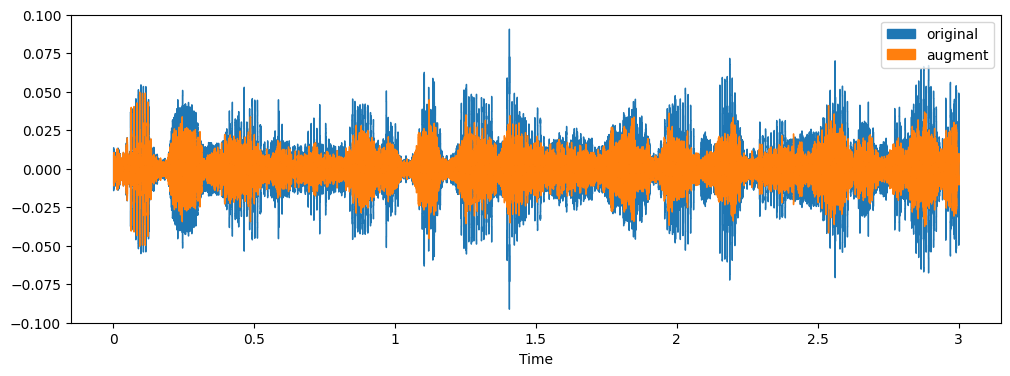

In [60]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, label = 'original', ax=ax)
librosa.display.waveshow(y_new, sr=sr, label = 'augment', ax=ax)
plt.legend()
plt.show()


In [59]:
Audio(my_test_file)